The only difference between this step and the last one is that a source term is added, meaning that there is entry (and exit) in the $u$ direction. The equations in full are as follows:

$$ \frac{\delta u}{\delta t} + u\frac{\delta u}{\delta x} + v \frac{\delta u}{\delta y} = -\frac{1}{p} \frac{\delta p}{\delta x} + \eta (\frac{\delta ^2 u}{\delta x^2} + \frac{\delta ^2 u}{\delta y ^2}) + F$$

$$ \frac{\delta v}{\delta t} + u\frac{\delta v}{\delta x} + v \frac{\delta v}{\delta y} = -\frac{1}{p} \frac{\delta p}{\delta y} + \eta (\frac{\delta ^2 v}{\delta x^2} + \frac{\delta ^2 v}{\delta y ^2}) $$

$$\frac{\delta ^2 p}{\delta x^2} + \frac{\delta ^2 p}{\delta y^2} = -\rho (\frac{\delta u}{\delta x}\frac{\delta u}{\delta x} + 2 \frac{\delta u}{\delta y}\frac{\delta v}{\delta x} + \frac{\delta v}{\delta y}\frac{\delta v}{\delta y})$$

This extra term results in only a small difference in our discretised and solved equations, which become the following:

These can be discretised and solved for the appropriate terms ($u_{i,j}^{n+1}$, $v_{i,j}^{n+1}$, and $p_{i,j}^n$).

$$ u_{i,j}^{n+1} = u_{i,j}^n - u_{i,j}^n \frac{\Delta t}{\Delta x} (u_{i,j}^n - u_{i-1,j}^n) - v_{i,j}^n \frac{\Delta t}{\Delta y} (u_{i,j}^n - u_{i,j-1}^n) - \frac{\Delta t}{2p\Delta x} (p_{i+1,j}^n - p_{i-1,j}^n) + \eta (\frac{\Delta t}{\Delta x^2}(u_{i+1,j}^n - 2u_{i,j}^n + u_{i-1,j}^n) + \frac{\Delta t}{\Delta y^2} (u_{i,j+1} - 2u_{i,j}^n + u_{i,j-1})) + \Delta t F$$


$$ v_{i,j}^{n+1} = v_{i,j}^n - u_{i,j}^n \frac{\Delta t}{\Delta x} (v_{i,j}^n - v_{i-1,j}^n) - v_{i,j}^n \frac{\Delta t}{\Delta y} (v_{i,j}^n - v_{i,j-1}^n) - \frac{\Delta t}{2p\Delta y} (p_{i,j+1}^n - p_{i,j-1}^n) + \eta (\frac{\Delta t}{\Delta x^2}(v_{i+1,j}^n - 2v_{i,j}^n + v_{i-1,j}^n) + \frac{\Delta t}{\Delta y^2} (v_{i,j+1} - 2v_{i,j}^n + v_{i,j-1}))$$


$$ p_{i,j}^n = \frac{(p_{i+1,j}^n + p_{i-1,j}^n) \Delta y^2 + (p_{i,j+1}^n + p_{i,j-1}^n) \Delta x^2}{2(\Delta x^2 + \Delta y^2)} - \frac{\rho \Delta x^2 \Delta y^2}{2(\Delta x^2 + \Delta y^2)} \times b$$

Where b:

$$b = \frac{1}{\Delta t} (\frac{u_{i+1,j}^n - u_{i-1,j}^n}{2\Delta x} + \frac{v_{i,j+1}^n - v_{i,j-1}}{2\Delta y}) - \frac{u_{i+1,j}^n - u_{i-1,j}^n}{2\Delta x} \frac{u_{i+1,j}^n - u_{i-1,j}^n}{2\Delta x} - 2 \frac{u_{i,j+1}^n - u_{i,j-1}^n}{2\Delta y} \frac{v_{i+1,j}^n - v_{i-1,j}^n}{2\Delta x} - \frac{v_{i,j+1}^n - u_{i,j-1}^n}{2\Delta y} \frac{v_{i,j+1}^n - u_{i,j-1}^n}{2\Delta y}$$


These equations are copied from the previous step and edited, so I'm hoping that these are fully correct.

The initial conditions this time, are:

u, v, and p = 0 everywhere.

The boundary conditions are:

- u, v, and p are periodic on x=0,2
- u,v = 0 at y = 0,2
- F = 1 everywhere
- $\frac{\delta p}{\delta x} = 0$ at x = 0,2

In [1]:
#Importing packages

#Plotting library that is new to me
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
#Defined initial conditions

nx = 41
ny = 41
steps = 10
steps_poisson = 50
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)


#Creating grid
x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)
X, Y = np.meshgrid(x, y)

#Parameters
rho = 1
vis = .1
dt = .001
F = 1

def init(ny, nx):

    #Variable storage grids
    u = np.zeros((ny, nx))
    v = np.zeros((ny, nx))
    p = np.zeros((ny, nx)) 
    b = np.zeros((ny, nx))
    
    return u, v, p, b

In [3]:
#Importing packages

#Plotting library that is new to me
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [4]:
#Copied over function to avoid mistyping

def build_up_b(b, rho, dt, dx, dy, u, v):
    b[1:-1, 1:-1] = (rho * (1 / dt * ((u[1:-1, 2:] - u[1:-1, 0:-2]) / (2 * dx) +
                                      (v[2:, 1:-1] - v[0:-2, 1:-1]) / (2 * dy)) -
                            ((u[1:-1, 2:] - u[1:-1, 0:-2]) / (2 * dx))**2 -
                            2 * ((u[2:, 1:-1] - u[0:-2, 1:-1]) / (2 * dy) *
                                 (v[1:-1, 2:] - v[1:-1, 0:-2]) / (2 * dx))-
                            ((v[2:, 1:-1] - v[0:-2, 1:-1]) / (2 * dy))**2))
    
    # Periodic BC Pressure @ x = 2
    b[1:-1, -1] = (rho * (1 / dt * ((u[1:-1, 0] - u[1:-1,-2]) / (2 * dx) +
                                    (v[2:, -1] - v[0:-2, -1]) / (2 * dy)) -
                          ((u[1:-1, 0] - u[1:-1, -2]) / (2 * dx))**2 -
                          2 * ((u[2:, -1] - u[0:-2, -1]) / (2 * dy) *
                               (v[1:-1, 0] - v[1:-1, -2]) / (2 * dx)) -
                          ((v[2:, -1] - v[0:-2, -1]) / (2 * dy))**2))

    # Periodic BC Pressure @ x = 0
    b[1:-1, 0] = (rho * (1 / dt * ((u[1:-1, 1] - u[1:-1, -1]) / (2 * dx) +
                                   (v[2:, 0] - v[0:-2, 0]) / (2 * dy)) -
                         ((u[1:-1, 1] - u[1:-1, -1]) / (2 * dx))**2 -
                         2 * ((u[2:, 0] - u[0:-2, 0]) / (2 * dy) *
                              (v[1:-1, 1] - v[1:-1, -1]) / (2 * dx))-
                         ((v[2:, 0] - v[0:-2, 0]) / (2 * dy))**2))
    
    return b

In [5]:
#Copied over function again to avoid mistyping

def pressure_poisson_periodic(p, dx, dy, steps_poisson):    
    for q in range(steps_poisson):
        pnext = p.copy()
        pnext[1:-1, 1:-1] = (((p[1:-1, 2:] + p[1:-1, 0:-2]) * dy**2 +
                          (p[2:, 1:-1] + p[0:-2, 1:-1]) * dx**2) /
                         (2 * (dx**2 + dy**2)) -
                         dx**2 * dy**2 / (2 * (dx**2 + dy**2)) * b[1:-1, 1:-1])

        # Periodic BC Pressure @ x = 2
        pnext[1:-1, -1] = (((p[1:-1, 0] + p[1:-1, -2])* dy**2 +
                        (p[2:, -1] + p[0:-2, -1]) * dx**2) /
                       (2 * (dx**2 + dy**2)) -
                       dx**2 * dy**2 / (2 * (dx**2 + dy**2)) * b[1:-1, -1])

        # Periodic BC Pressure @ x = 0
        pnext[1:-1, 0] = (((p[1:-1, 1] + p[1:-1, -1])* dy**2 +
                       (p[2:, 0] + p[0:-2, 0]) * dx**2) /
                      (2 * (dx**2 + dy**2)) -
                      dx**2 * dy**2 / (2 * (dx**2 + dy**2)) * b[1:-1, 0])
        
        # Wall boundary conditions, pressure
        pnext[-1, :] = p[-2, :]  # dp/dy = 0 at y = 2
        pnext[0, :] = p[1, :]  # dp/dy = 0 at y = 0
        
        p, pnext = pnext, p
    
    return p

In [6]:
#Edited update function

def channel_flow(u, v, b, p, dt, dx, dy, rho, vis):
    udiff = 1
    i = 0

    while udiff > .001:
        i += 1
        
        unext = u.copy()
        vnext = v.copy()

        b = build_up_b(b, rho, dt, dx, dy, u, v)
        p = pressure_poisson_periodic(p, dx, dy, steps_poisson)

        unext[1:-1, 1:-1] = (u[1:-1, 1:-1] -
                         u[1:-1, 1:-1] * dt / dx * 
                        (u[1:-1, 1:-1] - u[1:-1, 0:-2]) -
                         v[1:-1, 1:-1] * dt / dy * 
                        (u[1:-1, 1:-1] - u[0:-2, 1:-1]) -
                         dt / (2 * rho * dx) * 
                        (p[1:-1, 2:] - p[1:-1, 0:-2]) +
                         vis * (dt / dx**2 * 
                        (u[1:-1, 2:] - 2 * u[1:-1, 1:-1] + u[1:-1, 0:-2]) +
                         dt / dy**2 * 
                        (u[2:, 1:-1] - 2 * u[1:-1, 1:-1] + u[0:-2, 1:-1])) + 
                         F * dt)

        vnext[1:-1, 1:-1] = (v[1:-1, 1:-1] -
                         u[1:-1, 1:-1] * dt / dx * 
                        (v[1:-1, 1:-1] - v[1:-1, 0:-2]) -
                         v[1:-1, 1:-1] * dt / dy * 
                        (v[1:-1, 1:-1] - v[0:-2, 1:-1]) -
                         dt / (2 * rho * dy) * 
                        (p[2:, 1:-1] - p[0:-2, 1:-1]) +
                         vis * (dt / dx**2 *
                        (v[1:-1, 2:] - 2 * v[1:-1, 1:-1] + v[1:-1, 0:-2]) +
                         dt / dy**2 * 
                        (v[2:, 1:-1] - 2 * v[1:-1, 1:-1] + v[0:-2, 1:-1])))

        # Periodic BC u @ x = 2     
        unext[1:-1, -1] = (u[1:-1, -1] - u[1:-1, -1] * dt / dx * 
                      (u[1:-1, -1] - u[1:-1, -2]) -
                       v[1:-1, -1] * dt / dy * 
                      (u[1:-1, -1] - u[0:-2, -1]) -
                       dt / (2 * rho * dx) *
                      (p[1:-1, 0] - p[1:-1, -2]) + 
                       vis * (dt / dx**2 * 
                      (u[1:-1, 0] - 2 * u[1:-1,-1] + u[1:-1, -2]) +
                       dt / dy**2 * 
                      (u[2:, -1] - 2 * u[1:-1, -1] + u[0:-2, -1])) + F * dt)

        # Periodic BC u @ x = 0
        unext[1:-1, 0] = (u[1:-1, 0] - u[1:-1, 0] * dt / dx *
                     (u[1:-1, 0] - u[1:-1, -1]) -
                      v[1:-1, 0] * dt / dy * 
                     (u[1:-1, 0] - u[0:-2, 0]) - 
                      dt / (2 * rho * dx) * 
                     (p[1:-1, 1] - p[1:-1, -1]) + 
                      vis * (dt / dx**2 * 
                     (u[1:-1, 1] - 2 * u[1:-1, 0] + u[1:-1, -1]) +
                      dt / dy**2 *
                     (u[2:, 0] - 2 * u[1:-1, 0] + u[0:-2, 0])) + F * dt)

        # Periodic BC v @ x = 2
        vnext[1:-1, -1] = (v[1:-1, -1] - u[1:-1, -1] * dt / dx *
                      (v[1:-1, -1] - v[1:-1, -2]) - 
                       v[1:-1, -1] * dt / dy *
                      (v[1:-1, -1] - v[0:-2, -1]) -
                       dt / (2 * rho * dy) * 
                      (p[2:, -1] - p[0:-2, -1]) +
                       vis * (dt / dx**2 *
                      (v[1:-1, 0] - 2 * v[1:-1, -1] + v[1:-1, -2]) +
                       dt / dy**2 *
                      (v[2:, -1] - 2 * v[1:-1, -1] + v[0:-2, -1])))

        # Periodic BC v @ x = 0
        vnext[1:-1, 0] = (v[1:-1, 0] - u[1:-1, 0] * dt / dx *
                     (v[1:-1, 0] - v[1:-1, -1]) -
                      v[1:-1, 0] * dt / dy *
                     (v[1:-1, 0] - v[0:-2, 0]) -
                      dt / (2 * rho * dy) * 
                     (p[2:, 0] - p[0:-2, 0]) +
                      vis * (dt / dx**2 * 
                     (v[1:-1, 1] - 2 * v[1:-1, 0] + v[1:-1, -1]) +
                      dt / dy**2 * 
                     (v[2:, 0] - 2 * v[1:-1, 0] + v[0:-2, 0])))


        # Wall BC: u,v = 0 @ y = 0,2
        unext[0, :] = 0
        unext[-1, :] = 0
        vnext[0, :] = 0
        vnext[-1, :]=0

        udiff = (np.sum(unext) - np.sum(u)) / np.sum(unext)
        
        unext, u = u, unext
        vnext, v = v, vnext
            
    return u, v

In [7]:
u, v, b, p = init(nx, ny)

u, v = channel_flow(u, v, b, p, dt, dx, dy, rho, vis)

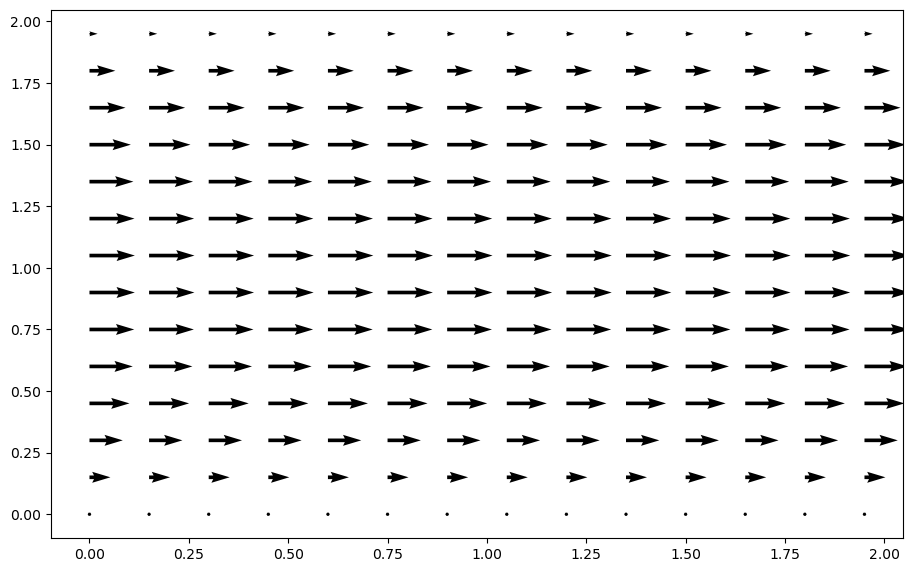

In [8]:
fig = plt.figure(figsize = (11,7), dpi=100)
plt.quiver(X[::3, ::3], Y[::3, ::3], u[::3, ::3], v[::3, ::3]);